# Template for Exercise 1 in the MASD 2018 exam

This is a template for doing Exercise 1 of the MASD 2018 Exam. Please fill out the fields and function templates below, reading the data as below, in order to perform the exercise. Feel free to load extra functions, but note that built-in functions for doing the entire task are, as a general rule, not allowed.

If you are unsure how to interpret the template, or what you are allowed to do, please contact us either by email or using the Absalon forum.

In [2]:
# Importing packages -- feel free to add more, but recall that you should not use built-in 
# functions for the task at hand. If in doubt, ask us by email.
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import inv

First of all, we load the data to which we will fit a polynomial function

Text(0,0.5,'y')

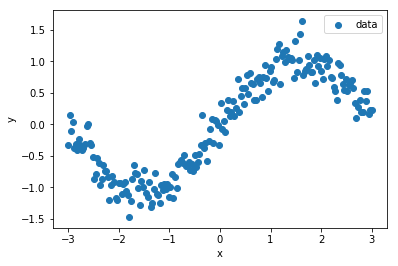

In [3]:
data = np.loadtxt('E1data.txt')
xs = data[:,0]
ys = data[:,1]
plt.scatter(xs, ys, label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

**Exercise 1 e:** In the box below, implement the computation of $\textbf{w}$ for the dataset supplied above. Perform the computation for $d = 4$, and plot the corresponding function $f_\mathbf{w}$ together with the data. Try different values of $d$. What do you see?

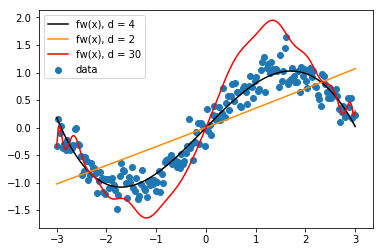

In [8]:
data = np.loadtxt('E1data.txt')
xs = data[:,0].copy()
ys = data[:,1].copy()

def fw(w,x):
    retVal = 0
    for j in range(len(w)):
        retVal = retVal + w[j]*(x**(j+1))
    return retVal
    
def calcW(d, matrix):
    yVec = matrix[:,1].copy()
    xVec = data[:,0].copy()
    xmat = np.empty([len(matrix[:,0]), d])
    
    for i in range(len(xVec)):
        for j in range(d):
            xmat[i][j] = xVec[i]**(j+1)

    return inv(xmat.transpose() @ xmat) @ xmat.transpose() @ yVec


plt.plot(xs, fw(calcW(4,data),xs), label="fw(x), d = 4", color='black')
plt.plot(xs, fw(calcW(2,data),xs), label="fw(x), d = 2", color='darkorange')
plt.plot(xs, fw(calcW(30,data),xs), label="fw(x), d = 30", color='red')
#plt.plot(calcW(d,data), label='w')
plt.scatter(xs, ys, label='data')
plt.legend()

**Exercise 1f:** In the box below, implement gradient descent to find the optimal $\mathbf{w}$. Run it on the supplied dataset with $d=4$ and compare your solution to the optimal solution from e) by plotting them together.

In [76]:
def polyfit_gradient(xs, ys, d, w0):
    # This function is meant to compute the gradient of E with respect to the variable vector w = [w1, ..., wd]^T
    # Input: * the vector of data point x-coordinates, xs
    #        * the vector of data point y-coordinates, ys
    #        * the wanted polynomial degree d
    #        * The current value w0 of w
    # Return: The gradient grad_w of E with respect to w at w=w0
                                            
    return grad_w

In [7]:
# function from lecture slides
def fgrad(x,y):
    exp1 = -(x**2 + x*y + y**2)
    exp2 = -((x-1.5)**2 + (y-1.5)**2)
    fx = -1.5*(2*x + y)*np.exp(exp1) - 4*(x-1.5)*np.exp(exp2)
    fy = -1.5*(x + 2*y)*np.exp(exp1) - 4*(y-1.5)*np.exp(exp2)
    return np.array([fx, fy])

# function from lecture slides
def ggrad(x,y):
    exp = -(x**2 + x*y + y**2)
    dx = -(2*x+y)*np.exp(exp)
    dy = -(x + 2*y)*np.exp(exp)
    return np.array([dx, dy])

def polyfitGD(xs, ys, d):
    # A template function for performing gradient descent over w to minimize E
    # Input: * the vector of data point x-coordinates, xs
    #        * the vector of data point y-coordinates, ys
    #        * the wanted polynomial degree d
        
    # Initialize at random
    np.random.seed(1) # Fixed seed for reproducibility; please don't change
    w = np.random.randn(d)
    
    # Set learning rate (you may want to play with this)
    learningrate = 0.00001
    
    # Setting parameters for convergence check 
    # (you may want to play with the latter two)
    num_iter = 1                   # This is the variable that will keep track of the number of iterations
    convergence = 0                # This is the variable that will keep track of whether we have converged
    max_iter = 10000               # We stop the algorithm after this many iterations
    tolerance = 0.01               # We conclude convergence when the magnitude of the gradient
                                   # is less than the tolerance
    
    while convergence == 0:
        ####################### MISSING PART ############## 
        # Compute gradient and take a step in the direction it dictates
        
        cur_grad_norm = np.linalg.norm(ggrad(xs,ys))
        
        ####################### MISSING PART ##############        
        # Check for convergence -- you need to fill in the computation of the norm of the gradient at the current location
        num_iter = num_iter + 1      
        #cur_grad_norm = ##### MISSING
        
        if cur_grad_norm < tolerance:
            convergence = 1
            print('converged')
        elif num_iter > max_iter:
            convergence = 1 
            print('reached maximum nr of iterations')
    
    return w

Next, run your code to compute the optimal $\textbf{w}$, and compare it to your optimal value of $\mathbf{w}$ from above, both by comparing the resulting vectors, and by plotting the two functions together, along with the data.

In [9]:
polyfitGD(xs,ys,4)

reached maximum nr of iterations


array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])